In [4]:
!pip install -Uqq fastai duckduckgo_search

In [5]:
from fastcore.all import *
from duckduckgo_search import ddg_images

def search_images(term, max_images=30):
  print(f"Searching for '{term}' ")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
urls = search_images(term='apple', max_images=1)
urls[0]

Searching for 'apple' 


'https://www.botanicaplantnursery.co.uk/user/products/large/red-devil-apple-400-p.jpg'

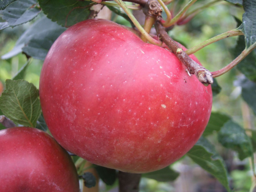

In [7]:
from fastdownload import download_url
dest = 'apple.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'pear' 


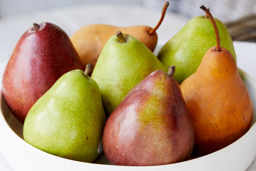

In [8]:
download_url(search_images(term='pear', max_images=1)[0], 'pear.jpg', show_progress=False)
Image.open('pear.jpg').to_thumb(256,256)

In [9]:
searches = 'apples', 'pears'
path = Path('apple_or_pears')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(term=f"{o} photo", max_images=50))
  sleep(10)
  download_images(dest, urls=search_images(term=f"{o} on table photo", max_images=20))
  sleep(10)
  download_images(dest, urls=search_images(term=f"{o} in water photo", max_images=10))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'apples photo' 
Searching for 'apples on table photo' 
Searching for 'apples in water photo' 


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Searching for 'pears photo' 
Searching for 'pears on table photo' 
Searching for 'pears in water photo' 


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

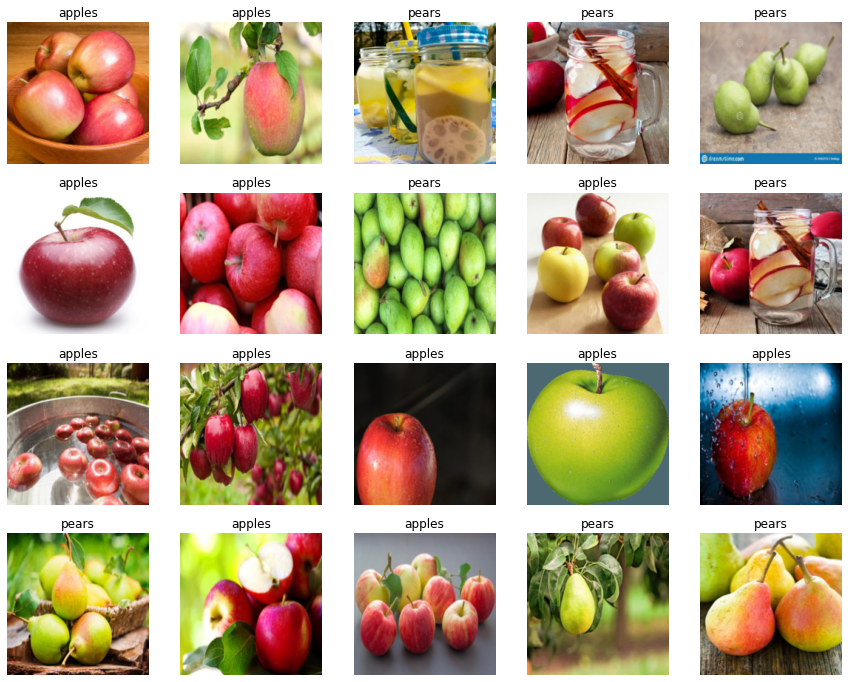

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=20)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.959391,0.415857,0.161290,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.424409,0.229622,0.161290,00:01
1,0.430043,0.089052,0.032258,00:01
2,0.306219,0.065249,0.032258,00:01
